# Задание

Используемый набор данных — данные магазина. Он управляет более чем 3000 аптек в 7 европейских странах. Задача — предсказать их ежедневные продажи на срок до шести недель вперед:
1. EDA
2. Анализ временных рядов 
3.Прогнозирование моделирование
4. Результаты
5. Презентация

## Импорт и описание данных

Id — идентификатор, представляющий дуплет (Магазин, Дата) в тестовом наборе

Магазин — уникальный идентификатор для каждого магазина

Продажи — товарооборот за любой заданный день (это то, что вы прогнозируете)

Клиенты — количество клиентов в заданный день

Открыто — индикатор того, был ли магазин открыт: 0 = закрыт, 1 = открыт

StateHoliday — указывает на государственный праздник. Обычно все магазины, за редким исключением, закрыты в государственные праздники. Обратите внимание, что все школы закрыты в государственные праздники и выходные. a = государственный праздник, b = пасхальные каникулы, c = рождество, 0 = нет

SchoolHoliday — указывает, повлияло ли закрытие государственных школ на (Магазин, Дата)

StoreType — различает 4 модели магазинов: a, b, c, d

Assortment — описывает уровень ассортимента: a = базовый, b = дополнительный, c = расширенный

CompetitionDistance — расстояние в метрах до ближайшего магазина-конкурента

CompetitionOpenSince[Month/Year] — указывает примерный год и месяц открытия ближайшего магазина-конкурента

Promo — указывает, проводит ли магазин промо-акцию в этот день

Promo2 — Promo2 — это продолжающаяся и последовательная акция для некоторых магазинов: 0 = магазин не участвует, 1 = магазин участвует

Promo2Since[Year/Week] — описывает год и календарную неделю, когда магазин начал участвовать в Promo2

PromoInterval — описывает последовательные интервалы начала Promo2, называя месяцы акция начинается заново. Например, "Фев,Май,Авг,Нояб" означает, что каждый раунд начинается в феврале, мае, августе, ноябре любого года для этого магазина

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
data = pd.read_csv('store.csv')
data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [24]:
data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [25]:
data_test = pd.read_csv('test.csv')
data_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [26]:
data_train = pd.read_csv('train.csv')
data_train.head()

/tmp/ipykernel_102291/4092987709.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train = pd.read_csv('train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


## EDA

In [31]:
data1 = data_train.merge(data, on='Store', how='left')

In [32]:
data1['Date'] = pd.to_datetime(data1['Date'])

In [33]:
data1 = data1[(data1['Open'] == 1) & (data1['Sales'] > 0)]

In [34]:
data1.isnull().mean().sort_values(ascending=False)

Promo2SinceWeek              0.501330
PromoInterval                0.501330
Promo2SinceYear              0.501330
CompetitionOpenSinceYear     0.318119
CompetitionOpenSinceMonth    0.318119
CompetitionDistance          0.002589
DayOfWeek                    0.000000
Store                        0.000000
Date                         0.000000
Sales                        0.000000
StoreType                    0.000000
SchoolHoliday                0.000000
StateHoliday                 0.000000
Promo                        0.000000
Open                         0.000000
Customers                    0.000000
Assortment                   0.000000
Promo2                       0.000000
dtype: float64

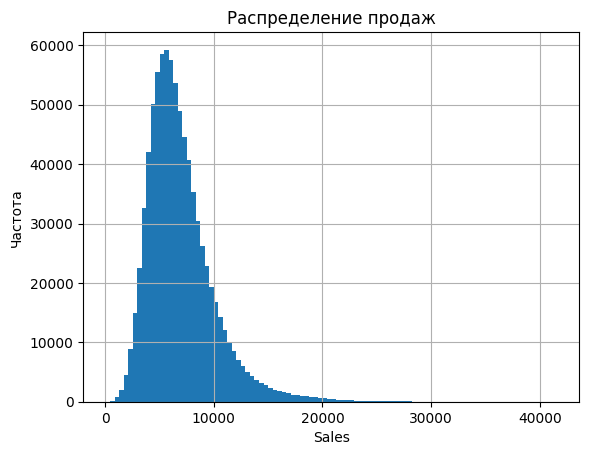

In [36]:
import matplotlib.pyplot as plt

data1['Sales'].hist(bins=100)
plt.title("Распределение продаж")
plt.xlabel("Sales")
plt.ylabel("Частота")
plt.show()


## Анализ временных рядов

In [37]:
data1['Year'] = data1['Date'].dt.year
data1['Month'] = data1['Date'].dt.month
data1['DayOfWeek'] = data1['Date'].dt.dayofweek
data1['WeekOfYear'] = data1['Date'].dt.isocalendar().week

Сначала рассмотрим продажи по месяцам и по дням недели

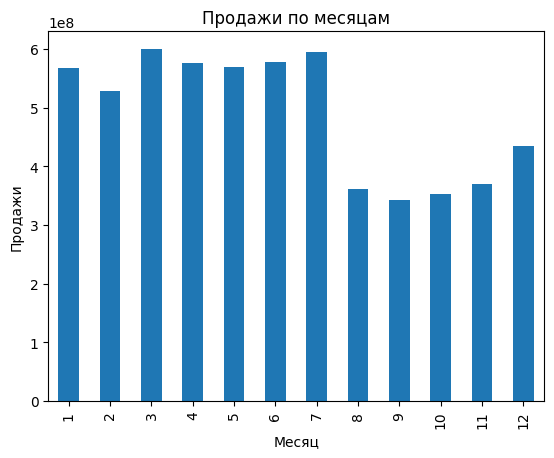

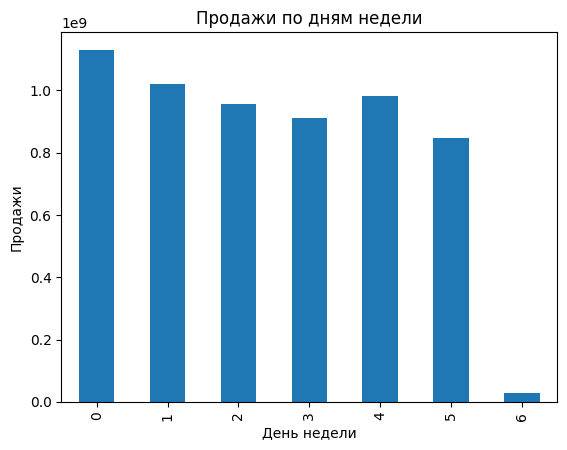

In [ ]:
# продажи по месяцам
monthly_sales = data1.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='bar', title='Продажи по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Продажи')
plt.show()

# продажи по дням недели
weekday_sales = data1.groupby('DayOfWeek')['Sales'].sum()
weekday_sales.plot(kind='bar', title='Продажи по дням недели')
plt.xlabel('День недели')
plt.ylabel('Продажи')
plt.show()


Тренды по годам

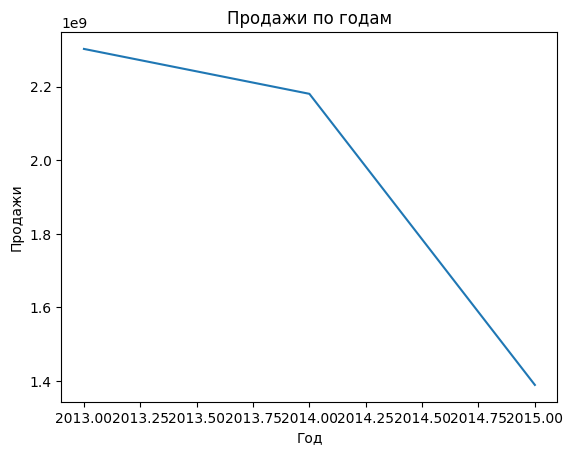

In [39]:
yearly_sales = data1.groupby('Year')['Sales'].sum()
yearly_sales.plot(kind='line', title='Продажи по годам')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

Можно выбрать конкретный магазин и посмотреть динамику продаж

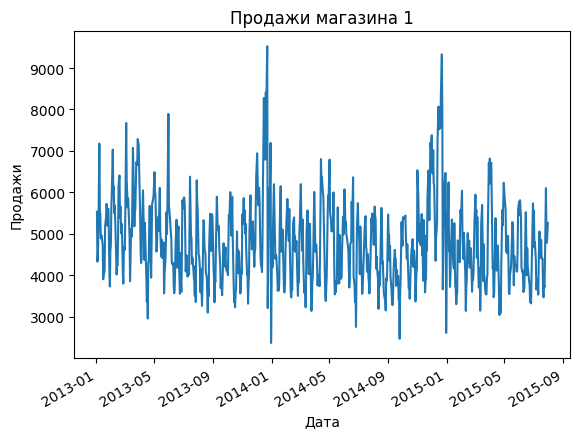

In [40]:
store_sales = data1[data1['Store'] == 1].groupby('Date')['Sales'].sum()
store_sales.plot(kind='line', title='Продажи магазина 1')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.show()


Влияние акций на продажи (Promo, Promo2)

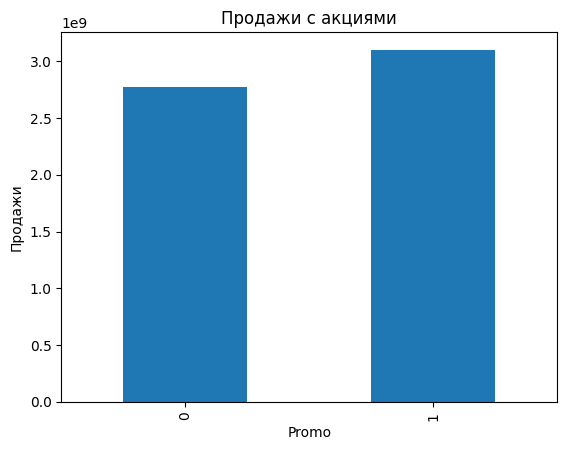

In [42]:
promo_sales = data1.groupby('Promo')['Sales'].sum()
promo_sales.plot(kind='bar', title='Продажи с акциями')
plt.xlabel('Promo')
plt.ylabel('Продажи')
plt.show()


## Прогнозирование и моделирование

### Предобработка кратко

In [45]:
data2 = data_test.merge(data, on='Store', how='left')

In [53]:
dataframes = [data1, data2]

columns_to_fill = {
    'CompetitionDistance': 'median',
    'CompetitionOpenSinceMonth': 'median',
    'CompetitionOpenSinceYear': 'median',
    'Promo2SinceWeek': 'mode',
    'Promo2SinceYear': 'mode',
    'PromoInterval': 'mode',
    'Open': 1
}

for data in dataframes:
    for column, method in columns_to_fill.items():
        if method == 'median':
            data[column].fillna(data[column].median(), inplace=True)
        elif method == 'mode':
            data[column].fillna(data[column].mode()[0], inplace=True)
        elif method == 1:
            data[column].fillna(1, inplace=True)

/tmp/ipykernel_102291/2351058192.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
/tmp/ipykernel_102291/2351058192.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [54]:
print(data1.isnull().sum().sum(), data2.isnull().sum().sum())

0 0


### Моделирования и предсказания

In [66]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

# Разделим данные на X и y для обучения
X_train = data1.drop(columns=['Sales', 'Date'])  # Убираем целевую переменную и дату
y_train = data1['Sales']  # Целевая переменная

# Обработка пропусков: заполняем числовые признаки медианой
imputer = SimpleImputer(strategy='median')
numeric_cols = X_train.select_dtypes(exclude=['object']).columns
X_train[numeric_cols] = imputer.fit_transform(X_train[numeric_cols])

# Преобразуем категориальные признаки с помощью OneHotEncoder (только строки)
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Преобразуем только строковые столбцы
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])

# Объединяем закодированные данные с числовыми
X_train_final = pd.DataFrame(X_train[numeric_cols].values)
X_train_final = pd.concat([X_train_final, pd.DataFrame(X_train_encoded)], axis=1)

# Обучение модели
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_final, y_train)

# Обработка тестовых данных (data2)
X_test = data2.drop(columns=['Sales', 'Date'])
X_test[numeric_cols] = imputer.transform(X_test[numeric_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Объединяем закодированные тестовые данные с числовыми
X_test_final = pd.DataFrame(X_test[numeric_cols].values)
X_test_final = pd.concat([X_test_final, pd.DataFrame(X_test_encoded)], axis=1)

# Прогнозируем
y_pred = model.predict(X_test_final)

# Добавляем прогнозы в data2
data2['Sales_RF_Pred'] = y_pred

# Оценка модели (MSE и RMSE)
mse = mean_squared_error(data2['Sales'], y_pred)
rmse = mse ** 0.5

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['int', 'str']